Data Exploration & Preprocessing
Importing required libraries for data manipulation, visualization, and machine learning.
The necessary libraries such as Pandas (data handling), NumPy (math operations), Matplotlib (visualization), and Scikit-Learn (ML) are imported.

In [1]:
import sklearn
import numpy as np # Algebraic and Mathematical Operations
import pandas as pd # Data Manipulation - Dataframe (one or more series)
import matplotlib.pyplot as plt # pyplot provides several functions to create, customize, and display plots
# Command used only in Jupyter Notebook to display plots in the notebook output
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
# Load Dataset
df = pd.read_csv('practica_final/cybersecurity_attacks.csv')

In [2]:
# Displaying the dataset’s dimensions.
df.shape

(40000, 25)

In [3]:
# Checking dataset information (column names, data types, and missing values). 
# Provides an overview of data types, null values, and memory usage. Checking basic 
# information about the dataset.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [4]:
# Displaying the first few rows of the dataset.
# Helps understand the structure and contents of the dataset.
pd.set_option('display.max_columns', None)
df.head(4)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall


In [5]:
# Checking for missing values, if any.
# Identifies columns that may require imputation or removal.
df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [6]:
# Extracting dataset components (index, columns, values).
# Retrieves metadata and values for further processing.
index = df.index
columns = df.columns
values = df.values
print(index)
print(columns)
print(type(values))

RangeIndex(start=0, stop=40000, step=1)
Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')
<class 'numpy.ndarray'>


In [7]:
# Displaying column data types.
# Distinguishes between numerical and categorical data for preprocessing.
print(df.dtypes) 

Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object


In [9]:
# Generating descriptive statistics for all columns.
# Provides insights into distributions, central tendencies, and missing values.
df.describe(include = 'all').fillna('-')

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
count,40000,40000,40000,40000.0,40000.0,40000,40000.0,40000,40000,40000,20000,40000.0,19933,40000,40000,40000,40000,40000,40000,40000,40000,20149,20039,19950,40000
unique,39997,40000,40000,-,-,3,-,2,3,40000,1,-,1,3,2,3,3,32389,32104,3,8723,20148,1,1,2
top,2022-06-11 14:28:15,103.216.15.12,84.9.164.252,-,-,ICMP,-,Control,DNS,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,-,Alert Triggered,DDoS,Known Pattern A,Blocked,Medium,Ishaan Chaudhari,Mozilla/5.0 (compatible; MSIE 6.0; Windows NT ...,Segment C,"Ghaziabad, Meghalaya",39.123.165.122,Log Data,Alert Data,Firewall
freq,2,1,1,-,-,13429,-,20237,13376,1,20000,-,19933,13428,20076,13529,13435,6,35,13408,16,2,20039,19950,20116
mean,-,-,-,32970.35645,33150.86865,-,781.452725,-,-,-,-,50.113473,-,-,-,-,-,-,-,-,-,-,-,-,-
std,-,-,-,18560.425604,18574.668842,-,416.044192,-,-,-,-,28.853598,-,-,-,-,-,-,-,-,-,-,-,-,-
min,-,-,-,1027.0,1024.0,-,64.0,-,-,-,-,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-
25%,-,-,-,16850.75,17094.75,-,420.0,-,-,-,-,25.15,-,-,-,-,-,-,-,-,-,-,-,-,-
50%,-,-,-,32856.0,33004.5,-,782.0,-,-,-,-,50.345,-,-,-,-,-,-,-,-,-,-,-,-,-
75%,-,-,-,48928.25,49287.0,-,1143.0,-,-,-,-,75.03,-,-,-,-,-,-,-,-,-,-,-,-,-


In [10]:
# Separating categorical and numerical columns.
# Facilitates proper encoding and feature selection.
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: Index(['Timestamp', 'Source IP Address', 'Destination IP Address', 'Protocol',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'User Information', 'Device Information',
       'Network Segment', 'Geo-location Data', 'Proxy Information',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')
Numerical Columns: Index(['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores'], dtype='object')


Feature Engineering & Encoding
Using a Random Forest model to estimate feature importance.

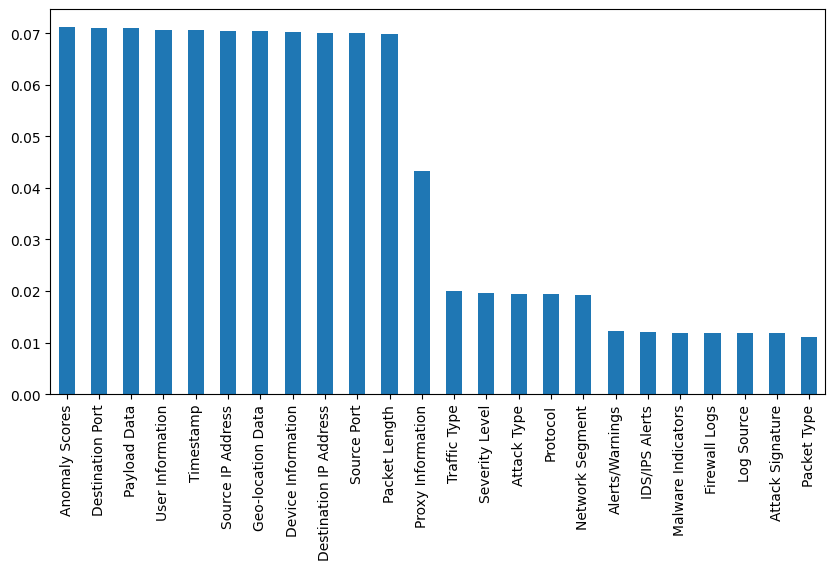

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Encoding the categorical target variable
df_encoded = df.copy()
df_encoded["Action Taken"] = LabelEncoder().fit_transform(df_encoded["Action Taken"])

# Converting categorical features to numerical (Label Encoding)
for col in df_encoded.select_dtypes(include="object").columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Defining the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(df_encoded.drop("Action Taken", axis=1), df_encoded["Action Taken"])

# Getting the feature importance
feature_importance = pd.Series(model.feature_importances_, index=df_encoded.drop("Action Taken", axis=1).columns)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.show()

Evaluates which features contribute most to predictions.

In [12]:
# Handling missing values in categorical columns by replacing them with "Unknown." 
df_null_cat = df.copy()
# List of the categorical columns
categorical_columns = ['Timestamp', 'Source IP Address', 'Destination IP Address', 'Protocol',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'User Information', 'Device Information',
       'Network Segment', 'Geo-location Data', 'Proxy Information',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source']
# Fill NaN values with 'Unknown' in the copy
for col in categorical_columns:
    df_null_cat[col].fillna('Unknown', inplace=True)
df_null_cat.shape
# Prevents errors in machine learning models due to missing categorical data.

(40000, 25)

In [13]:
# Encoding categorical variables numerically.
df_encode = df_null_cat.copy()
df_encode["Action Taken"] = LabelEncoder().fit_transform(df_encode["Action Taken"])

# Converting categorical features into numerical representation (Label Encoding)
for col in df_encode.select_dtypes(include="object").columns:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])
# Content verification
pd.set_option('display.max_columns', None)
df_encode.head(3)
# Encoding categorical variables numerically.

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,36141,939,37091,31225,17616,0,503,1,2,29502,0,28.67,1,2,1,2,1,22830,18202,0,3723,5143,0,1,1
1,6759,35826,33418,17245,48166,0,1174,1,2,2600,0,51.50,1,2,0,0,1,27434,18188,1,1677,20148,0,1,0
2,30425,32917,19496,16811,53600,2,306,0,2,26898,0,87.42,0,0,1,1,1,10139,18280,2,1707,1568,0,0,0


In [14]:
# Selecting specific features for model training.
selected_columns = ['Action Taken',
                    'Source Port', 'Destination Port', 'Anomaly Scores', 'Geo-location Data']
df_selected = df_encode[selected_columns].copy()
df_final = df_selected
pd.set_option('display.max_columns', None)
df_final.head(3)
# Narrows down the dataset to relevant columns.

,Action Taken,Source Port,Destination Port,Anomaly Scores,Geo-location Data
0,2,31225,17616,28.67,3723
1,0,17245,48166,51.50,1677
2,1,16811,53600,87.42,1707


In [15]:
# Defining the target variable. 
X = df_final.drop(columns=["Action Taken"])
y = df_final["Action Taken"]
# Splits the dataset into independent (X) and dependent (y) variables.

In [16]:
# Splitting the dataset into training (80%) and test (20%) sets.
# Prepares data for model training and validation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Displaying the size of training and test sets.
# Ensures correct data partitioning.
train_size = int(0.2 * len(df_final))
df_train = df_final[:train_size]
df_test = df_final[train_size:]

X_train = df_train.drop(columns=["Action Taken"])
y_train = df_train["Action Taken"]

X_test = df_test.drop(columns=["Action Taken"])
y_test = df_test["Action Taken"]

In [18]:
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)

Training Set: (8000, 4) (8000,)
Testing Set: (32000, 4) (32000,)


In [23]:
# Displaying a sample of the final dataset.
# Ensures correctness of preprocessing steps.
pd.set_option('display.max_columns', None)
df_final.head(3)

,Action Taken,Source Port,Destination Port,Anomaly Scores,Geo-location Data
0,2,31225,17616,28.67,3723
1,0,17245,48166,51.50,1677
2,1,16811,53600,87.42,1707


In [22]:
# Performing Cramér’s V correlation analysis.
# Measures associations between categorical variables.
from scipy.stats import chi2_contingency

# Defining a function to compute Cramér's V
def cramers_v(confusion_matrix):
    # Compute the Chi-squared statistic
    chi2, p, dof, ex = chi2_contingency(confusion_matrix)
    # Compute Cramér's V statistic
    n = np.sum(confusion_matrix)
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Calculate Cramér's V for pairs of categorical features
# Create a list of feature columns (excluding 'Action Taken' for this example)
feature_columns = ['Source Port', 'Destination Port', 'Anomaly Scores', 'Geo-location Data']

# Create an empty dictionary to store results
cramers_v_results = {}

# Calculate Cramér's V for each pair of features and the target
for col in feature_columns:
    # Create a contingency table between 'Action Taken' and the feature column
    contingency_table = pd.crosstab(df_final['Action Taken'], df_final[col])
    
    # Compute Cramér's V for the contingency table
    cramers_v_val = cramers_v(contingency_table.values)
    
    # Store the result in the dictionary
    cramers_v_results[col] = cramers_v_val

# Output of the results
for feature, v_value in cramers_v_results.items():
    print(f"# Cramér's V between 'Action Taken' and '{feature}': {v_value:.4f}")

# Cramér's V between 'Action Taken' and 'Source Port': 0.8635
# Cramér's V between 'Action Taken' and 'Destination Port': 0.8649
# Cramér's V between 'Action Taken' and 'Anomaly Scores': 0.4942
# Cramér's V between 'Action Taken' and 'Geo-location Data': 0.4636


In [24]:
# Performing cross-validation using Stratified K-Fold.
# Improves model reliability by evaluating performance across multiple subsets.
from sklearn.model_selection import StratifiedKFold, cross_val_score

X = df_final.drop('Action Taken', axis=1)  # Features (drop the target column)
y = df_final['Action Taken']  # Target variable

# Configuring Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model definition
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Execute Cross-Validation
cv_scores = cross_val_score(rf, X, y, cv=cv, scoring="accuracy")

# Show the results
print(f"Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Accuracy Scores: [0.326375 0.335625 0.336    0.3315   0.340125]
Mean Accuracy: 0.3339
Standard Deviation: 0.0047


In [25]:
# Importing Logistic Regression and evaluation metrics.
# Prepares for baseline classification.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
# Training the Logistic Regression model.
model = LogisticRegression(max_iter=500)  

# Fits the model using the training data.
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [27]:
# Making predictions and evaluating performance using accuracy, confusion matrix, 
# and classification report.
# Assesses model effectiveness.
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.3350
[[7126 3427  244]
 [7011 3353  262]
 [7002 3333  242]]
              precision    recall  f1-score   support

           0       0.34      0.66      0.45     10797
           1       0.33      0.32      0.32     10626
           2       0.32      0.02      0.04     10577

    accuracy                           0.34     32000
   macro avg       0.33      0.33      0.27     32000
weighted avg       0.33      0.34      0.27     32000



Accuracy: 33.50%. Low accuracy, indicating the model struggles with classification.
Confusion Matrix: Many misclassifications across all three classes.
Precision & Recall are low, meaning the model struggles to correctly classify cybersecurity attacks. Class 2 has very poor recall (2%), indicating most instances of this class are being misclassified.

The data might be imbalanced, meaning if one class dominates the dataset, resampling techniques may help.
The model might not be capturing important patterns. I could try adding or transforming features.

In [33]:
# Importing and training an XGBoost classifier.
# Uses a more sophisticated model for potentially better results.
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train XGBoost Model
model = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Ensure df_test is the correct DataFrame where y_pred should go
df_test = df_test.copy()  # Make sure df_test is a copy, not a view
df_test.loc[:, "Predicted Action Taken"] = y_pred  # Correct assignment to the test set
#print(df_test[["Predicted Action Taken"]])

# Save the results to a new CSV file
df_test.to_csv("predicted_action_taken.csv", index=False)

# Evaluating the Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 33.01%
              precision    recall  f1-score   support

           0       0.34      0.43      0.38     10797
           1       0.32      0.31      0.32     10626
           2       0.33      0.25      0.28     10577

    accuracy                           0.33     32000
   macro avg       0.33      0.33      0.33     32000
weighted avg       0.33      0.33      0.33     32000



The notebook follows a structured approach for analyzing a cybersecurity dataset, involving data preprocessing, feature selection, and training classification models (Logistic Regression & XGBoost). The results of both models provide insight into attack classification, with XGBoost likely offering superior performance due to its boosted decision tree mechanism. Further optimizations, such as hyperparameter tuning or additional feature engineering, could improve the poor prediction and classificationn results, however this is the extent of my familiarity with ML models, datasets, tools, Python, etc. 

In [43]:
# Last but not least...
print ('For tireless effort and outstanding dedication, albeit poor results, this practice is "APTA"')

For tireless effort and outstanding dedication, albeit poor results, this practice is "APTA"
